**Top 250 de las transferencias mas costosas del futbol**

## Objectivo


El futbol mueve millones de dolares en la transferencia de jugadores de futbol,
me gustaria saber si los equipos y/o ligas que mas mueven jugadores son los mas ganadores?
o hay equipos que aunque no sean los mas ganadores se dedican es al negocio de tranferir jugadores?

Cuales son las ligas que mas mueven jugadores?

que posiciones en el campo de juego son las mas buscadas por los equipos,o que posiciones son las mas 
transferidas.

In [235]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

from sklearn.preprocessing import MinMaxScaler
import seaborn           as sns   # visualizations
import matplotlib.pyplot as plt   # visualizations
from bokeh.io import output_notebook, show

import folium
import pylab as pl

import scipy.stats                # statistics
from sklearn import preprocessing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['top250-00-19.csv']


In [236]:
data_topsoccer0="../input/top250-00-19.csv"
df_topsoccer0 = pd.read_csv(data_topsoccer0)
df_topsoccer=pd.DataFrame(data=df_topsoccer0)
df_topsoccer.head()


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,nan,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,nan,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,nan,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,nan,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,nan,34500000


In [237]:
print(df_topsoccer.head(3))
print(df_topsoccer.info())
print(df_topsoccer.columns)
print(df_topsoccer.dtypes)
print(df_topsoccer.tail(3))
type(df_topsoccer)

            Name        Position     ...       Market_value Transfer_fee
0      Luís Figo    Right Winger     ...                nan     60000000
1  Hernán Crespo  Centre-Forward     ...                nan     56810000
2  Marc Overmars     Left Winger     ...                nan     40000000

[3 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
Name            4700 non-null object
Position        4700 non-null object
Age             4700 non-null int64
Team_from       4700 non-null object
League_from     4700 non-null object
Team_to         4700 non-null object
League_to       4700 non-null object
Season          4700 non-null object
Market_value    3440 non-null float64
Transfer_fee    4700 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB
None
Index(['Name', 'Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value', 'Transfer_fee'],
    

pandas.core.frame.DataFrame

 ## Exploracion de  Datos

Contamos con informacion de 4.700 transacciones de transferencias a traves de 10 variables 

In [238]:
pd.options.display.float_format = '{:.2f}'.format
df_topsoccer.describe()

,Age,Market_value,Transfer_fee
count,4700.00,3440.00,4700.00
mean,24.34,8622469.48,9447586.17
std,3.23,8795180.75,10437719.32
min,0.00,50000.00,825000.00
25%,22.00,3500000.00,4000000.00
50%,24.00,6000000.00,6500000.00
75%,27.00,10000000.00,10820000.00
max,35.00,120000000.00,222000000.00


## Tratamiento de valores nulos y ceros

* Con el objetivo de tener una data mas limpia, procedemos a reemplazar la edad minima de 0 por la media de las edades.

* De la misma manera los valores de mercado que se encuentran en 0 se reemplazaran por la media

In [239]:
df_topsoccer.replace({'Age' : 0}, 24, inplace=True) # reempplazar las edades en 0 por la media 
df_topsoccer['Market_value'] = df_topsoccer['Market_value'].fillna(0) # llenamos los valores vacios a 0
df_topsoccer.replace({'Market_value' : 0}, df_topsoccer['Market_value'].mean(), inplace=True) # reempplazar losn 0 por la media 
df_topsoccer.describe()

,Age,Market_value,Transfer_fee
count,4700.00,4700.00,4700.00
mean,24.34,8002775.84,9447586.17
std,3.21,7593528.31,10437719.32
min,15.00,50000.00,825000.00
25%,22.00,4500000.00,4000000.00
50%,24.00,6310913.83,6500000.00
75%,27.00,8050000.00,10820000.00
max,35.00,120000000.00,222000000.00


In [240]:
df_topsoccer

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,6310913.83,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,6310913.83,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,6310913.83,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,6310913.83,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,6310913.83,34500000
5,Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,6310913.83,26000000
6,Flávio Conceicao,Central Midfield,26,Dep. La Coruña,LaLiga,Real Madrid,LaLiga,2000-2001,6310913.83,25000000
7,Savo Milosevic,Centre-Forward,26,Real Zaragoza,LaLiga,Parma,Serie A,2000-2001,6310913.83,25000000
8,David Trézéguet,Centre-Forward,22,Monaco,Ligue 1,Juventus,Serie A,2000-2001,6310913.83,23240000
9,Claudio López,Centre-Forward,25,Valencia CF,LaLiga,Lazio,Serie A,2000-2001,6310913.83,23000000


## Exploración de Datos

In [241]:
Position_count=df_topsoccer.groupby ('Position')['Position'].count()
Age_count=df_topsoccer.groupby ('Age')['Age'].count()
TeamFrom_count=df_topsoccer.groupby ('Team_from')['Team_from'].count()
League_from_count=df_topsoccer.groupby ('League_from')['League_from'].count()
Season_count=df_topsoccer.groupby ('Season')['Season'].count()

realizamos una verificacion de la volumetria de los datos mas importantes , mas adelante verificamos su distribucion.

In [242]:
Position_count

Position
Attacking Midfield     426
Central Midfield       487
Centre-Back            714
Centre-Forward        1218
Defender                 1
Defensive Midfield     411
Forward                  3
Goalkeeper             180
Left Midfield           87
Left Winger            267
Left-Back              225
Midfielder               1
Right Midfield          63
Right Winger           305
Right-Back             181
Second Striker         130
Sweeper                  1
Name: Position, dtype: int64

In [243]:
Age_count

Age
15      1
16     10
17     23
18     82
19    165
20    302
21    371
22    461
23    519
24    537
25    524
26    481
27    404
28    327
29    223
30    157
31     59
32     30
33     15
34      5
35      4
Name: Age, dtype: int64

In [244]:
TeamFrom_count

Team_from
1. FC Köln         10
1.FC K'lautern      5
1.FC Nuremberg      9
1.FSV Mainz 05     16
1860 Munich         4
AC Le Havre         4
AC Milan           44
AEK Athens          2
AFC Ajax           37
AIK Solna           1
AJ Auxerre         17
AO Xanthi           1
AS Livorno          6
AS Nancy            8
AS Roma            43
AZ Alkmaar         21
Aalborg BK          1
Aalesund            1
Ahly                2
Ajax U19            2
Akademisk BK        2
Akhisarspor         1
Al Arabi            2
Al Gharafa          1
Al Qadisiyah        1
Al Rayyan           1
Al Sadd             3
Al-Ahli (UAE)       1
Al-Ain FC           3
Al-Ettifaq          1
                   ..
VfL Bochum          5
VfL Wolfsburg      20
Vicenza             3
Viking FK           1
Viktoria Plzen      1
Villarreal CF      31
Vit. Guimarães      5
Vitesse            11
Vitória Setúbal     2
Vojvodina           1
Vélez Sarsfield    18
Wanderers           1
Watford            12
Wattenscheid 09     1


In [245]:
League_from_count

League_from
 Argentina                         66
 Australia                          1
 Brazil                            89
 Bulgaria                           6
 Canada                             1
 Chile                             10
 China                              4
 Colombia                           5
 Croatia                           12
 Czech Republic                     8
 Denmark                            7
 Ecuador                            1
 England                           27
 Finland                            1
 France                             2
 Ghana                              1
 Iran                               2
 Korea, South                       3
 Latvia                             1
 Mexico                            12
 Moldova                            2
 Paraguay                           3
 Peru                               1
 Portugal                           7
 Qatar                              4
 Romania                            8


In [246]:
Season_count

Season
2000-2001    248
2001-2002    250
2002-2003    244
2003-2004    242
2004-2005    248
2005-2006    247
2006-2007    249
2007-2008    248
2008-2009    250
2009-2010    249
2010-2011    245
2011-2012    249
2012-2013    248
2013-2014    250
2014-2015    246
2015-2016    248
2016-2017    250
2017-2018    244
2018-2019    245
Name: Season, dtype: int64

Se realizan cruces entre variables, como edades de los jugadores en las diferenetes posiciones.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


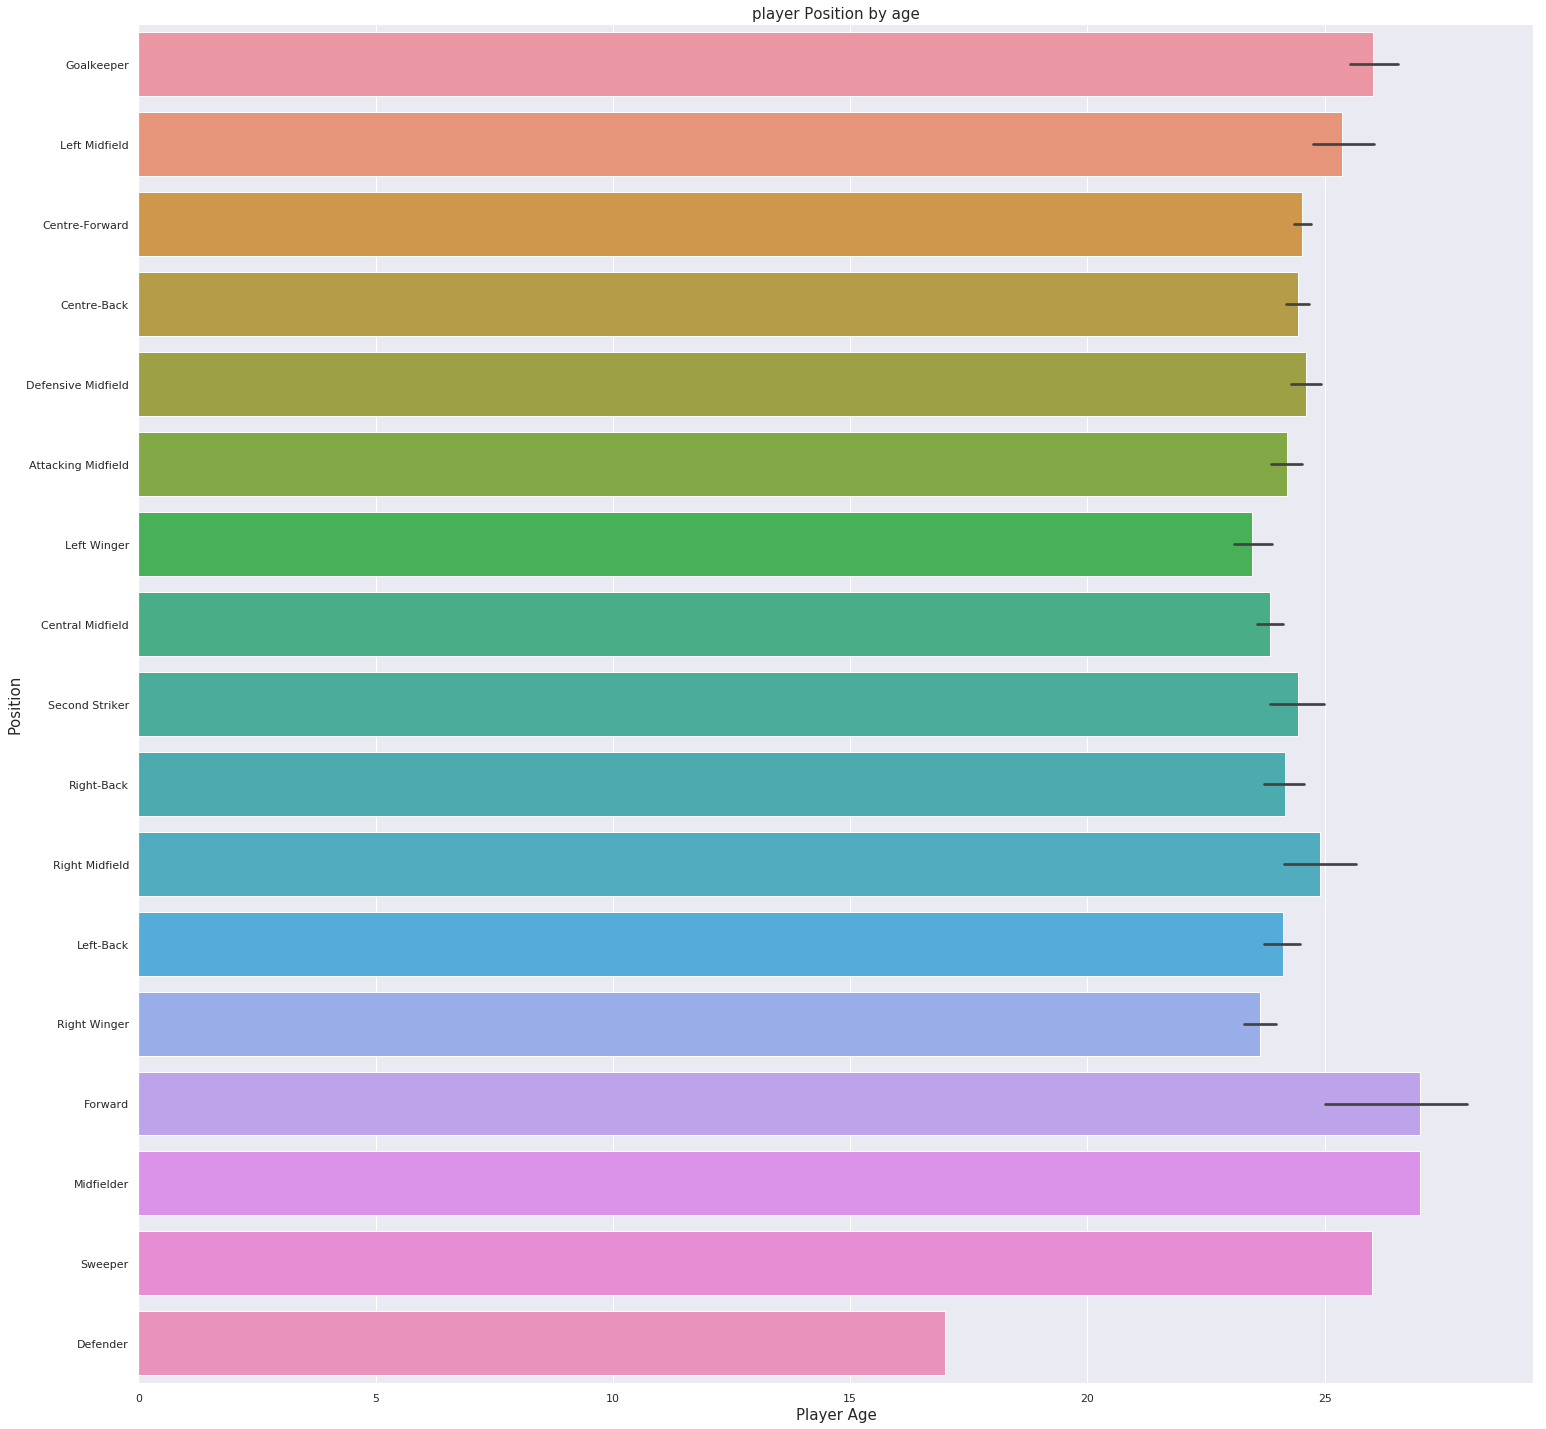

In [247]:
# Visualization League_from vs Age
df = df_topsoccer.sort_values(['Age'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(25,25))
sns.barplot(x=df["Age"],y=df["Position"])
plt.xlabel("Player Age",fontsize=15)
plt.ylabel("Position",fontsize=15)
plt.title("player Position by age",fontsize=15)
plt.show()

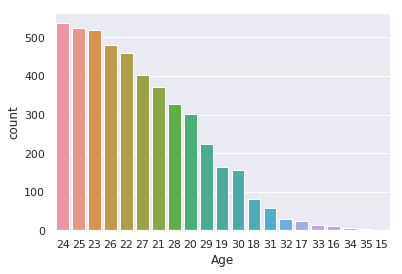

In [248]:
sns.set(style='darkgrid')
sns.countplot(x = 'Age',
              data = df_topsoccer,
              order = df_topsoccer['Age'].value_counts().index)
plt.show()

la mayor parte de los jugadores se encuentran entre los 23-25 

Barcharts to understand the distribution of categorical variables

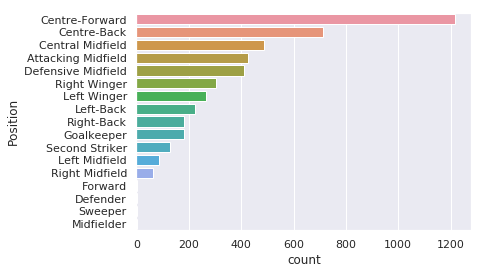

In [249]:
sns.set(style='darkgrid')
sns.countplot(y = 'Position',
              data = df_topsoccer,
              order = df_topsoccer['Position'].value_counts().index)
plt.show()

por una amplia diferencia los jugadores con posicion de delantero centro tienen la mayor cvantidad de movimiento en cuenta a transferencias se refiere.

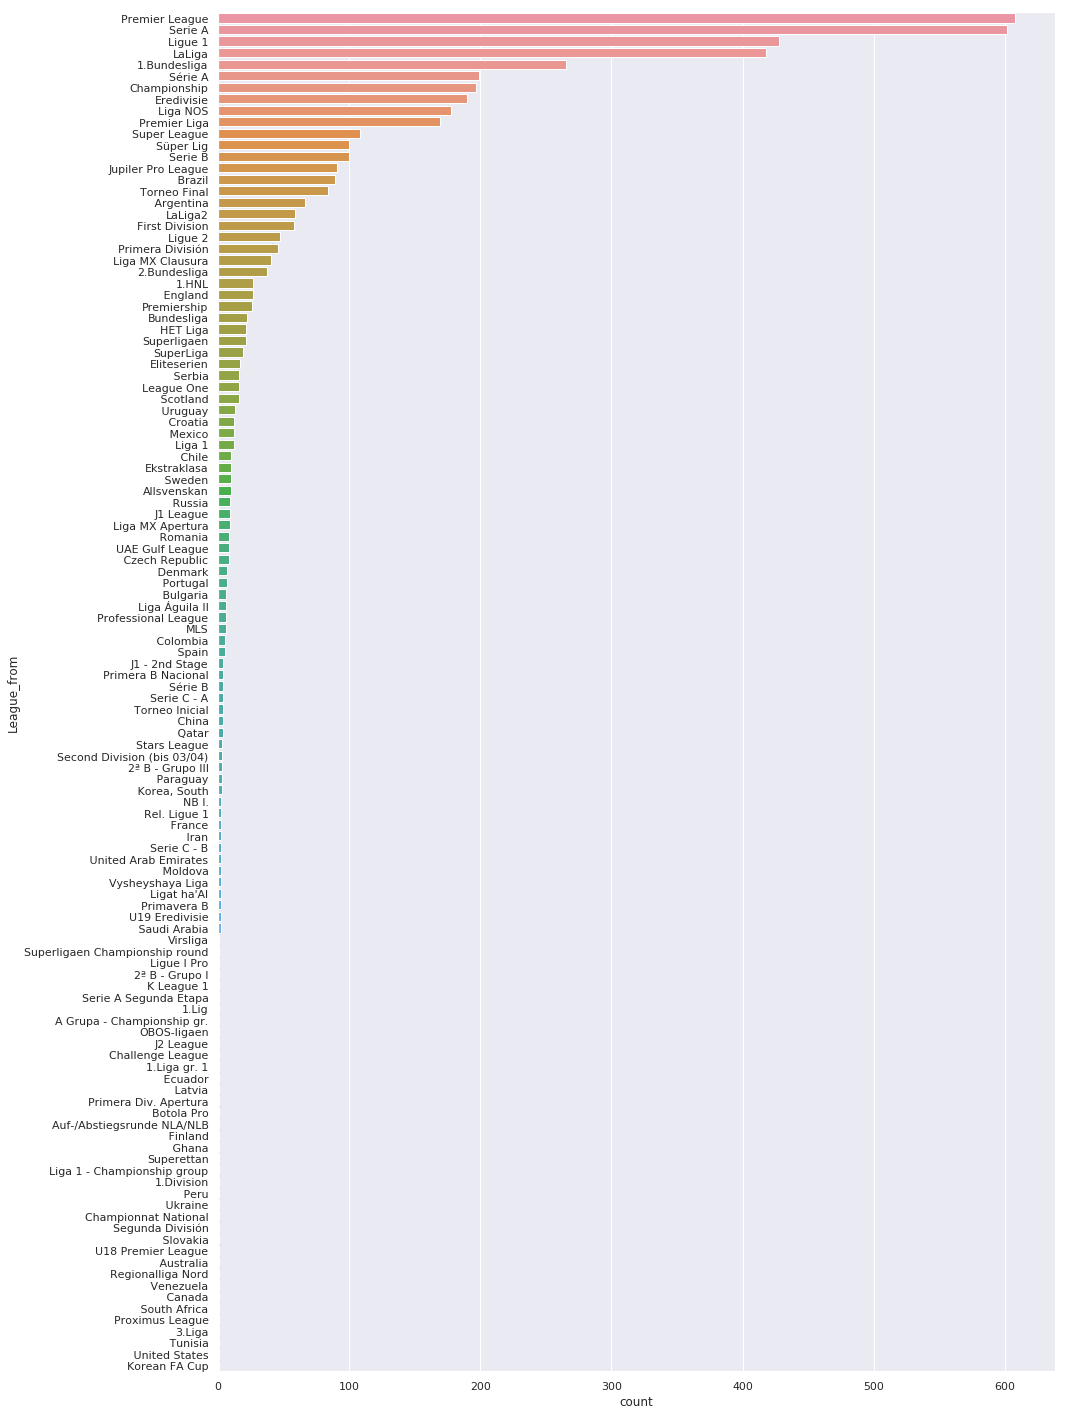

In [250]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,25))
sns.countplot(y = 'League_from',
              data = df_topsoccer,
              order = df_topsoccer['League_from'].value_counts().index)
plt.show()

la premier league y la serie A son las ligas que mas transferencia efectua en cada temporada.

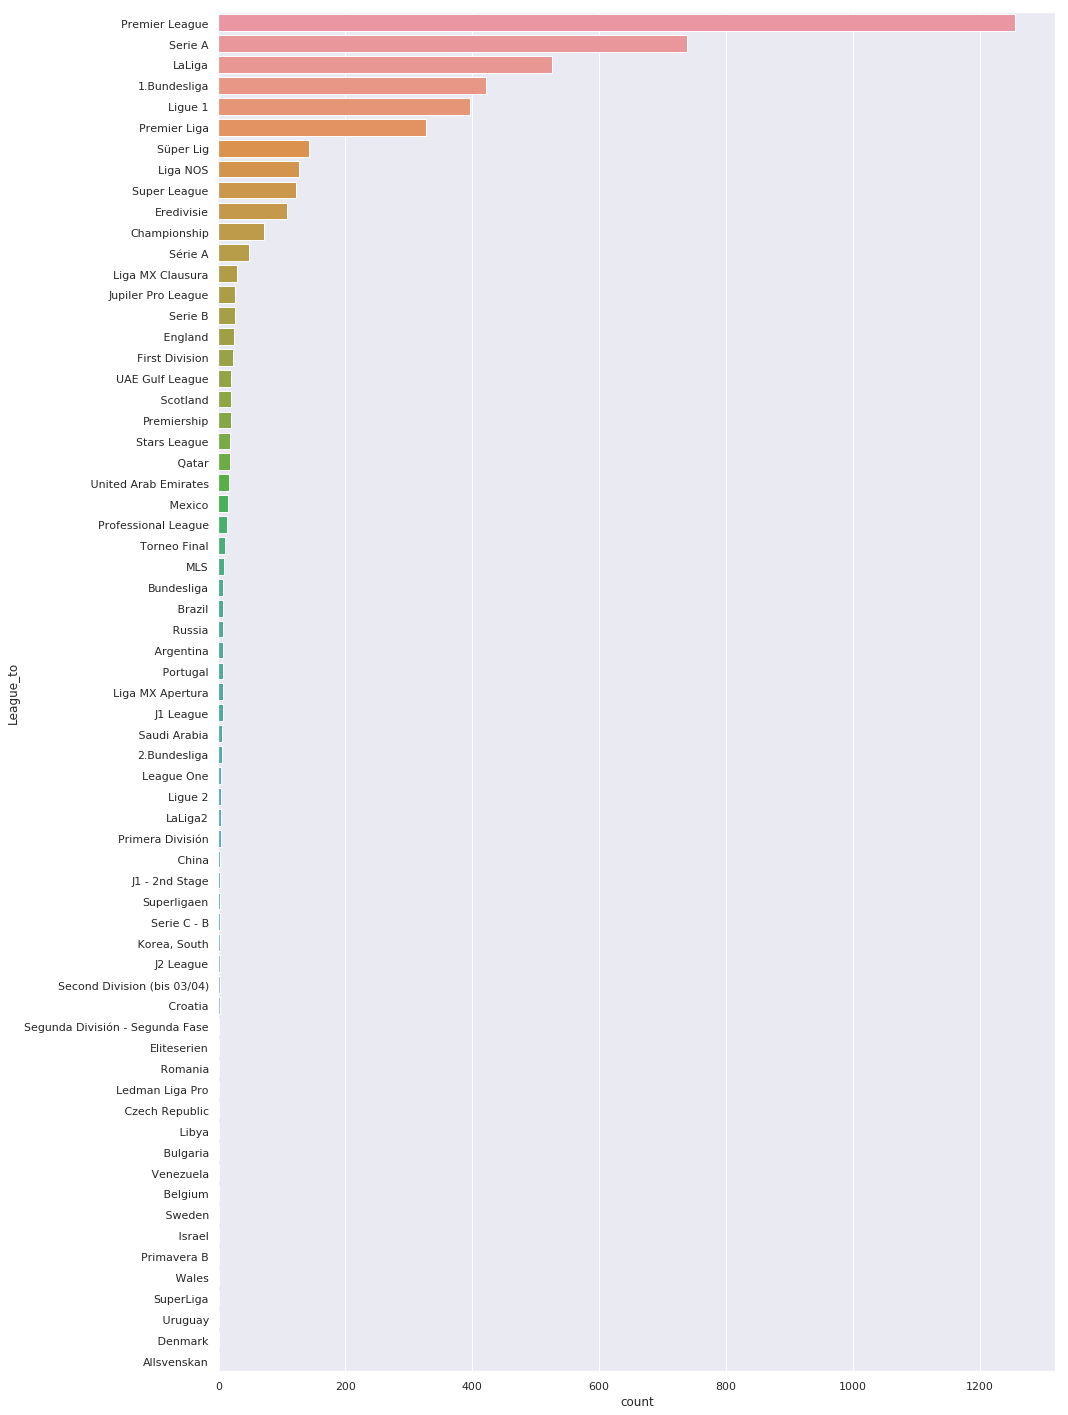

In [251]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,25))
sns.countplot(y = 'League_to',
              data = df_topsoccer,
              order = df_topsoccer['League_to'].value_counts().index)
plt.show()

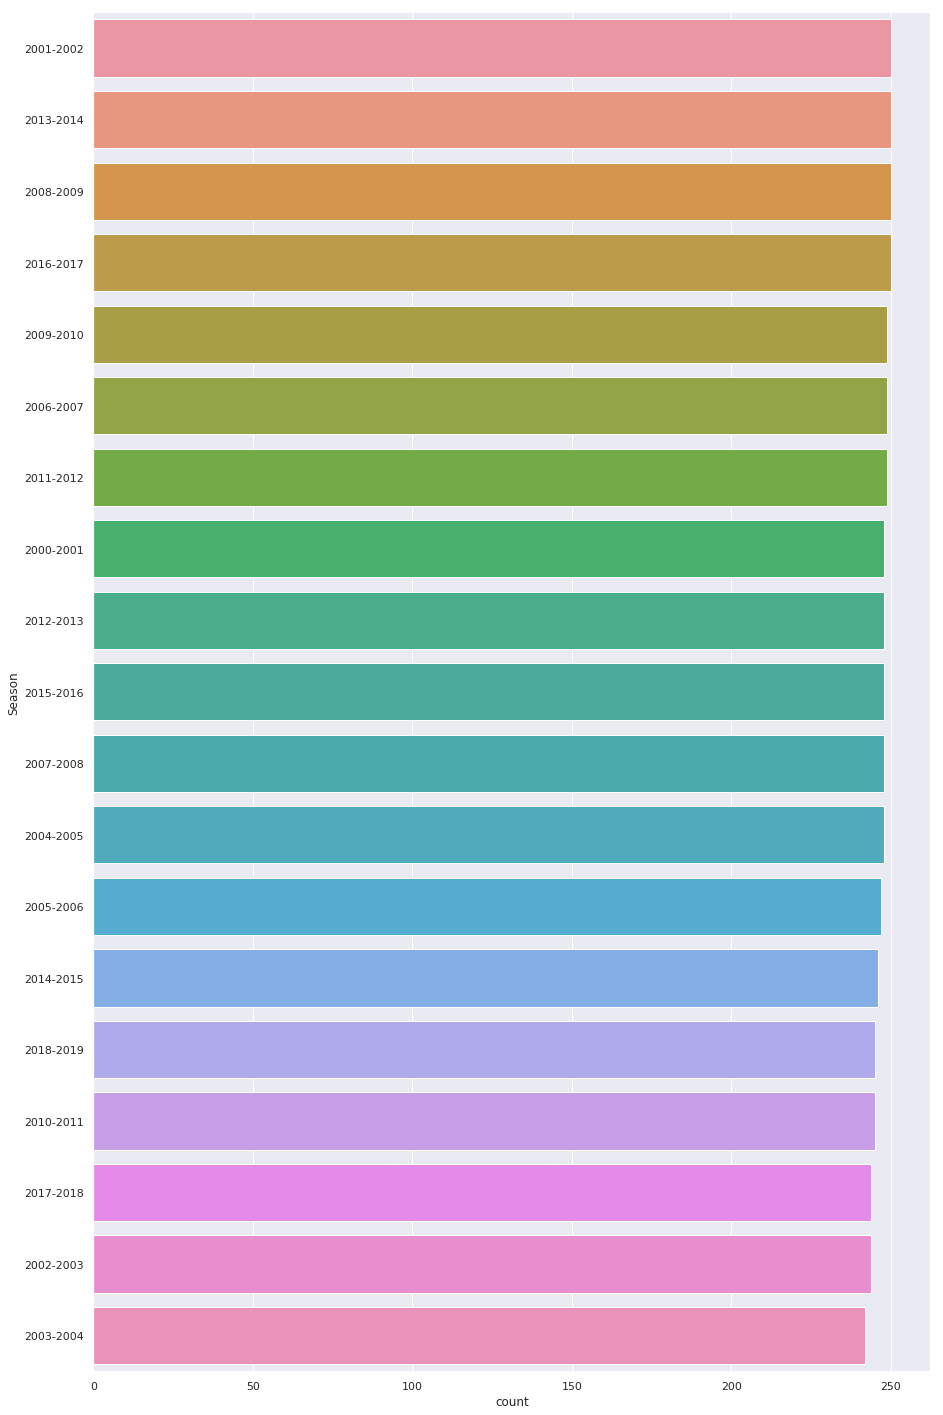

In [252]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,25))
sns.countplot(y = 'Season',
              data = df_topsoccer,
              order = df_topsoccer['Season'].value_counts().index)
plt.show()

de manera uniforme se observa la cantidad de transferencias que se hacen an cada una de las temporadas, manteniendose de una manera estable desde la temporada 2004-2005

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


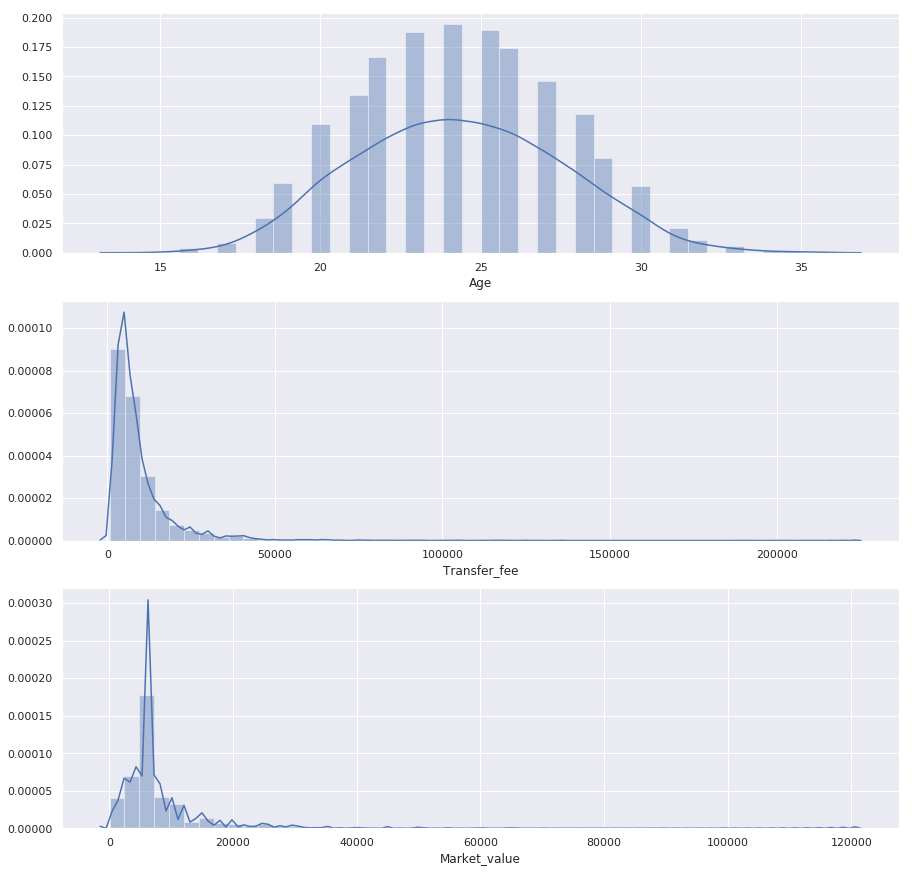

In [253]:
# Display the histogram to undestand the data

f, axes = plt.subplots(3, figsize=(15, 15))
sns.distplot( df_topsoccer["Age"], ax=axes[0])
sns.distplot( df_topsoccer["Transfer_fee"]/1000, ax=axes[1])
sns.distplot( df_topsoccer["Market_value"]/1000, ax=axes[2])


En cuanto a la edad, ratificamos que los jugadores con tendencua a ser transferidos entre los diferentes equipos, oscilan entre los 23-25

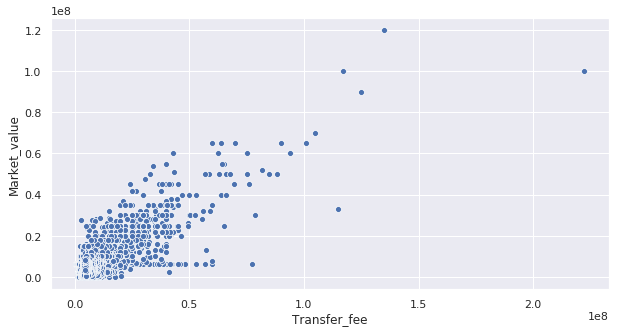

In [254]:
f, axes = plt.subplots(1, figsize=(10, 5))

sns.scatterplot(x="Transfer_fee", y="Market_value", data=df_topsoccer)


## Analisis de información 

In [255]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_topsoccer['Position'], columns=df_topsoccer['League_from'],
            margins=True).apply(lambda r: r/len(df_topsoccer) *100,
                                axis=1)

League_from,Argentina,Australia,Brazil,Bulgaria,Canada,Chile,China,Colombia,Croatia,Czech Republic,Denmark,Ecuador,England,Finland,France,Ghana,Iran,"Korea, South",Latvia,Mexico,Moldova,Paraguay,Peru,Portugal,Qatar,Romania,Russia,Saudi Arabia,Scotland,Serbia,Slovakia,South Africa,Spain,Sweden,Tunisia,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,...,Ligue 2,Ligue I Pro,MLS,NB I.,OBOS-ligaen,Premier League,Premier Liga,Premiership,Primavera B,Primera B Nacional,Primera Div. Apertura,Primera División,Professional League,Proximus League,Regionalliga Nord,Rel. Ligue 1,Second Division (bis 03/04),Segunda División,Serie A,Serie A Segunda Etapa,Serie B,Serie C - A,Serie C - B,Stars League,Super League,SuperLiga,Superettan,Superligaen,Superligaen Championship round,Série A,Série B,Süper Lig,Torneo Final,Torneo Inicial,U18 Premier League,U19 Eredivisie,UAE Gulf League,Virsliga,Vysheyshaya Liga,All
Position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Attacking Midfield,0.26,0.00,0.49,0.00,0.00,0.04,0.00,0.00,0.02,0.02,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,...,0.09,0.00,0.00,0.00,0.00,0.62,0.51,0.02,0.00,0.02,0.00,0.15,0.04,0.00,0.00,0.00,0.02,0.00,0.72,0.00,0.15,0.00,0.02,0.00,0.19,0.02,0.00,0.00,0.00,0.85,0.02,0.19,0.43,0.02,0.00,0.02,0.04,0.00,0.00,9.06
Central Midfield,0.13,0.00,0.21,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.00,0.04,0.00,0.00,0.02,0.00,0.04,0.04,0.00,0.00,0.04,0.00,0.00,0.02,0.00,0.00,0.02,0.00,...,0.11,0.00,0.00,0.02,0.02,1.57,0.40,0.13,0.02,0.02,0.00,0.06,0.00,0.00,0.02,0.02,0.00,0.00,1.70,0.00,0.21,0.00,0.00,0.00,0.11,0.04,0.00,0.02,0.00,0.45,0.00,0.11,0.09,0.00,0.00,0.00,0.02,0.00,0.00,10.36
Centre-Back,0.26,0.00,0.26,0.00,0.00,0.00,0.02,0.04,0.06,0.04,0.04,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.04,0.00,0.02,0.00,0.04,0.04,0.00,0.02,0.06,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.04,0.00,...,0.23,0.00,0.00,0.00,0.00,1.87,0.47,0.09,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,2.06,0.00,0.30,0.00,0.00,0.00,0.36,0.09,0.00,0.17,0.00,0.60,0.00,0.30,0.21,0.00,0.00,0.00,0.02,0.00,0.00,15.19
Centre-Forward,0.30,0.00,0.53,0.09,0.00,0.04,0.02,0.02,0.11,0.04,0.06,0.02,0.28,0.00,0.02,0.00,0.00,0.04,0.00,0.09,0.00,0.00,0.00,0.06,0.00,0.09,0.06,0.04,0.11,0.06,0.00,0.00,0.02,0.13,0.02,0.00,0.02,0.00,0.06,0.00,...,0.19,0.00,0.04,0.00,0.00,3.19,0.94,0.13,0.02,0.00,0.02,0.26,0.04,0.00,0.00,0.00,0.02,0.00,3.36,0.00,0.70,0.06,0.02,0.04,0.55,0.13,0.02,0.15,0.02,0.66,0.00,0.72,0.53,0.02,0.00,0.00,0.06,0.02,0.04,25.91
Defender,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02
Defensive Midfield,0.09,0.00,0.11,0.02,0.00,0.02,0.00,0.02,0.04,0.00,0.02,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,...,0.13,0.00,0.02,0.02,0.00,1.21,0.28,0.06,0.00,0.00,0.00,0.09,0.02,0.00,0.00,0.00,0.00,0.00,1.06,0.00,0.11,0.02,0.00,0.00,0.23,0.02,0.00,0.02,0.00,0.47,0.04,0.21,0.11,0.00,0.00,0.00,0.02,0.00,0.00,8.74
Forward,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06
Goalkeeper,0.06,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.

Las ligas de donde mas se transfieren jugadores son
**Premier league 12.94%
Serie A 12.81%**

In [256]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_topsoccer['Position'], columns=df_topsoccer['League_to'],
            margins=True).apply(lambda r: r/len(df_topsoccer) *100,
                                axis=1)

League_to,Argentina,Belgium,Brazil,Bulgaria,China,Croatia,Czech Republic,Denmark,England,Israel,"Korea, South",Libya,Mexico,Portugal,Qatar,Romania,Russia,Saudi Arabia,Scotland,Sweden,United Arab Emirates,Uruguay,Venezuela,Wales,1.Bundesliga,2.Bundesliga,Allsvenskan,Bundesliga,Championship,Eliteserien,Eredivisie,First Division,J1 - 2nd Stage,J1 League,J2 League,Jupiler Pro League,LaLiga,LaLiga2,League One,Ledman Liga Pro,Liga MX Apertura,Liga MX Clausura,Liga NOS,Ligue 1,Ligue 2,MLS,Premier League,Premier Liga,Premiership,Primavera B,Primera División,Professional League,Second Division (bis 03/04),Segunda División - Segunda Fase,Serie A,Serie B,Serie C - B,Stars League,Super League,SuperLiga,Superligaen,Série A,Süper Lig,Torneo Final,UAE Gulf League,All
Position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Attacking Midfield,0.04,0.00,0.04,0.02,0.00,0.02,0.00,0.00,0.06,0.00,0.00,0.00,0.04,0.00,0.02,0.00,0.02,0.02,0.02,0.00,0.11,0.00,0.00,0.00,0.81,0.04,0.00,0.06,0.04,0.00,0.26,0.00,0.00,0.04,0.00,0.04,0.89,0.02,0.00,0.00,0.02,0.11,0.34,0.87,0.02,0.04,1.60,0.94,0.02,0.00,0.02,0.09,0.00,0.00,0.98,0.02,0.04,0.02,0.36,0.00,0.00,0.30,0.45,0.09,0.11,9.06
Central Midfield,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.04,0.02,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.83,0.00,0.00,0.00,0.13,0.02,0.21,0.02,0.02,0.00,0.00,0.04,1.23,0.00,0.00,0.00,0.00,0.02,0.38,0.79,0.00,0.04,3.23,0.57,0.06,0.02,0.00,0.02,0.00,0.00,1.87,0.04,0.00,0.00,0.23,0.00,0.00,0.11,0.23,0.00,0.02,10.36
Centre-Back,0.09,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.11,0.00,0.00,0.02,0.02,0.00,0.06,0.00,0.00,0.00,0.00,0.00,1.74,0.02,0.00,0.00,0.19,0.00,0.21,0.04,0.00,0.00,0.00,0.11,1.57,0.00,0.02,0.00,0.00,0.02,0.40,1.19,0.00,0.00,4.47,1.21,0.09,0.00,0.02,0.00,0.00,0.00,2.66,0.09,0.00,0.04,0.21,0.00,0.02,0.04,0.45,0.02,0.00,15.19
Centre-Forward,0.00,0.00,0.04,0.00,0.04,0.02,0.00,0.02,0.17,0.00,0.00,0.02,0.09,0.09,0.17,0.00,0.06,0.09,0.13,0.02,0.23,0.00,0.00,0.02,2.09,0.04,0.00,0.06,0.77,0.00,0.79,0.30,0.04,0.09,0.02,0.26,2.64,0.09,0.02,0.02,0.04,0.21,0.57,2.26,0.02,0.06,6.00,1.53,0.13,0.00,0.02,0.09,0.00,0.02,3.91,0.26,0.02,0.19,0.79,0.02,0.02,0.32,0.83,0.06,0.11,25.91
Defender,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
Defensive Midfield,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.02,0.00,0.00,0.00,0.83,0.00,0.02,0.00,0.02,0.00,0.11,0.02,0.00,0.02,0.02,0.06,1.06,0.00,0.00,0.00,0.02,0.00,0.19,0.94,0.02,0.00,2.51,0.74,0.11,0.00,0.00,0.02,0.00,0.00,1.23,0.04,0.00,0.00,0.17,0.00,0.02,0.13,0.30,0.00,0.04,8.74
Forward,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.06
Goalkeeper,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.04,0.00,0.02,0.04,0.00,0.00,0.00,0.02,0.62,0.00,0.02,0.00,0.00,0.02,0.06,0.19,0.00,0.00,1.43,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.04,0.00,0.00,0.06,0.00,0.00,0.00,0.06,0.00,0.00,3.83
Left Midfield,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.11,0.00,0.00,0.00,0.00,0.00,0.09,0.21,0.00,0.00,0.68,0.09,0.00,0.00,0.00,0.02,0.00,0.00,0.17,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.02,1.85


El 25.91% de los centro delanteros son los mas transferidos dentro de las diferentes ligas de origen y destino

la premier League con 26.72% es la liga que mas adquiere jugadores.
la Serie A con 15.72% es la segunda liga que mas adquiere jugadores.

In [257]:
pd.crosstab(index=df_topsoccer['Season'], columns=df_topsoccer['Position'],
            margins=True).apply(lambda r: r/len(df_topsoccer) *100,
                                axis=1)

Position,Attacking Midfield,Central Midfield,Centre-Back,Centre-Forward,Defender,Defensive Midfield,Forward,Goalkeeper,Left Midfield,Left Winger,Left-Back,Midfielder,Right Midfield,Right Winger,Right-Back,Second Striker,Sweeper,All
Season,,,,,,,,,,,,,,,,,,
2000-2001,0.34,0.28,0.79,1.60,0.00,0.55,0.04,0.30,0.26,0.15,0.21,0.00,0.23,0.15,0.23,0.15,0.00,5.28
2001-2002,0.60,0.43,0.68,1.55,0.00,0.45,0.00,0.34,0.28,0.13,0.28,0.00,0.13,0.11,0.23,0.11,0.02,5.32
2002-2003,0.38,0.47,0.87,1.38,0.02,0.51,0.02,0.36,0.21,0.06,0.26,0.02,0.19,0.17,0.23,0.02,0.00,5.19
2003-2004,0.64,0.45,0.66,1.57,0.00,0.40,0.00,0.21,0.09,0.13,0.19,0.00,0.11,0.28,0.32,0.11,0.00,5.15
2004-2005,0.40,0.53,1.26,1.34,0.00,0.55,0.00,0.13,0.06,0.06,0.26,0.00,0.06,0.21,0.19,0.21,0.00,5.28
2005-2006,0.32,0.66,0.79,1.53,0.00,0.45,0.00,0.11,0.06,0.30,0.28,0.00,0.06,0.36,0.21,0.13,0.00,5.26
2006-2007,0.57,0.45,0.89,1.55,0.00,0.64,0.00,0.09,0.13,0.11,0.28,0.00,0.02,0.21,0.23,0.13,0.00,5.30
2007-2008,0.43,0.62,0.74,1.53,0.00,0.36,0.00,0.19,0.06,0.28,0.15,0.00,0.09,0.40,0.21,0.21,0.00,5.28
2008-2009,0.60,0.57,0.94,1.38,0.00,0.51,0.00,0.21,0.09,0.21,0.23,0.00,0.02,0.21,0.21,0.13,0.00,5.32


a traves de todas las temporadas se mantienen con el 25.91% que el centro delantero esl el jugador mas transferido, con los jugadores liberos y mediocampistas son los menos transferidos y tienden a permanecer mas tiempo en sus equipos.

In [258]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_topsoccer['Season'], columns=df_topsoccer['Age'],
            margins=True).apply(lambda r: r/len(df_topsoccer) *100,
                                axis=1)

Age,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,All
Season,,,,,,,,,,,,,,,,,,,,,,
2000-2001,0.00,0.00,0.00,0.06,0.17,0.11,0.70,0.55,0.38,0.49,0.51,0.55,0.51,0.51,0.32,0.21,0.09,0.09,0.00,0.00,0.02,5.28
2001-2002,0.00,0.00,0.00,0.09,0.21,0.36,0.43,0.60,0.60,0.49,0.32,0.60,0.43,0.38,0.30,0.32,0.09,0.02,0.04,0.04,0.02,5.32
2002-2003,0.00,0.00,0.06,0.09,0.11,0.19,0.60,0.47,0.64,0.43,0.47,0.64,0.51,0.43,0.34,0.21,0.02,0.00,0.00,0.00,0.00,5.19
2003-2004,0.00,0.04,0.02,0.11,0.19,0.60,0.45,0.51,0.60,0.57,0.53,0.34,0.28,0.30,0.17,0.21,0.06,0.06,0.11,0.00,0.00,5.15
2004-2005,0.00,0.02,0.02,0.09,0.09,0.38,0.43,0.60,0.79,0.53,0.68,0.60,0.32,0.40,0.15,0.09,0.04,0.02,0.02,0.02,0.00,5.28
2005-2006,0.02,0.06,0.02,0.04,0.13,0.34,0.38,0.70,0.53,0.74,0.62,0.55,0.34,0.38,0.19,0.04,0.11,0.02,0.00,0.02,0.00,5.26
2006-2007,0.00,0.00,0.06,0.17,0.19,0.23,0.30,0.49,0.49,0.47,0.77,0.66,0.49,0.28,0.23,0.26,0.06,0.11,0.02,0.02,0.00,5.30
2007-2008,0.00,0.00,0.04,0.06,0.23,0.38,0.45,0.49,0.55,0.64,0.40,0.64,0.49,0.45,0.26,0.06,0.09,0.04,0.00,0.00,0.00,5.28
2008-2009,0.00,0.02,0.02,0.11,0.21,0.26,0.51,0.38,0.66,0.60,0.51,0.66,0.55,0.47,0.11,0.21,0.02,0.02,0.00,0.00,0.00,5.32


El promedio de edad con mayor porcentaje de transferencias en la mayoria de las temporadas es 
23 , 24 , 25 con 11.04%, 11.43% y 11.15% respectivamente 

## Nuevas Características

Con el objetivo de determinar si la transferencia fue rentable para cada una de las posiciones , calculamos la media por posicion y por liga de origen, el jugador vendido por encima de la media fue una transferencia rentable, de lo contrario no lo fue tanto 

In [259]:
SumPosition = df_topsoccer.reset_index().groupby(('Position','League_from'))['Transfer_fee'].sum()
CountPosition= df_topsoccer.reset_index().groupby(('Position','League_from'))['Transfer_fee'].count()

MedPosition= SumPosition/CountPosition
df_topsoccer1=pd.DataFrame(data=MedPosition)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [260]:
df_topsoccer1

Transfer_fee
Position           League_from                              
Attacking Midfield  Argentina                     5879166.67
                    Brazil                        5476086.96
                    Chile                         5350000.00
                    Croatia                       1500000.00
                    Czech Republic               14500000.00
                    England                       3750000.00
                    Iran                          2500000.00
                    Romania                       2500000.00
                    Scotland                      1500000.00
                    Serbia                        3400000.00
                    United Arab Emirates          6000000.00
                    Uruguay                       4500000.00
                   1.Bundesliga                  16152173.91
                   1.HNL                          6260000.00
                   2.Bundesliga                   4083333.33
                   2ª B - Grupo III               6000000.00
                   Bundesliga                     4250000.00
                   Championship                   9570000.00
                   Ekstraklasa                    3625000.00
                   Eliteserien                    4000000.00
                   Eredivisie                     9775000.00
                   First Division                 6950000.00
                   HET Liga                       4200000.00
                   J1 - 2nd Stage                 4166666.67
                   J2 League                      4000000.00
                   Jupiler Pro League             6600000.00
                   LaLiga                        12502571.43
                   LaLiga2                        7166666.67
                   League One                     7043333.33
                   Liga 1 - Championship group    8200000.00
...                                                      ...
Second Striker      Slovakia                      6750000.00
                    Uruguay                       3000000.00
                   1.Bundesliga                  12183333.33
                   2.Bundesliga                   7000000.00
                   Championship                   9087500.00
                   Eredivisie                     5500000.00
                   First Division                 7500000.00
                   HET Liga                       3250000.00
                   Jupiler Pro League             4250000.00
                   K League 1                     4000000.00
                   LaLiga                         8445833.33
                   LaLiga2                        5750000.00
                   Liga MX Clausura               6400000.00
                   Liga Águila II                 4000000.00
                   Ligat ha'Al                    7230000.00
                   Ligue 1                        7833333.33
                   Ligue 2                        3000000.00
                   MLS                            3000000.00
                   Premier League                11035000.00
                   Premier Liga                   8937500.00
                   Premiership                    1750000.00
                   Primera B Nacional            11900000.00
                   Primera División              10500000.00
                   Serie A                        8977666.67
                   Serie B                        9040000.00
                   Super League                   4300000.00
                   Superligaen                    3000000.00
                   Série A                       13016666.67
                   Torneo Final                   8066666.67
Sweeper            1.Bundesliga                   2250000.00

[585 rows x 1 columns]

In [261]:
df_topsoccer2 = pd.merge(df_topsoccer1, df_topsoccer, on='Position' and 'League_from')
df_topsoccer2 

,League_from,Transfer_fee_x,Name,Position,Age,Team_from,Team_to,League_to,Season,Market_value,Transfer_fee_y
0,Argentina,5879166.67,Pablo Aimar,Attacking Midfield,21,River Plate,Valencia CF,LaLiga,2000-2001,6310913.83,21250000
1,Argentina,5879166.67,Wálter Samuel,Centre-Back,22,Boca Juniors,AS Roma,Serie A,2000-2001,6310913.83,20800000
2,Argentina,5879166.67,Juan Pablo Ángel,Centre-Forward,25,River Plate,Aston Villa,Premier League,2000-2001,6310913.83,14400000
3,Argentina,5879166.67,Claudio Husaín,Defensive Midfield,25,River Plate,SSC Napoli,Serie A,2000-2001,6310913.83,9300000
4,Argentina,5879166.67,Martín Palermo,Centre-Forward,27,Boca Juniors,Villarreal CF,LaLiga,2000-2001,6310913.83,7600000
5,Argentina,5879166.67,Diego Placente,Left-Back,23,River Plate,Bay. Leverkusen,1.Bundesliga,2000-2001,6310913.83,7300000
6,Argentina,5879166.67,Lucas Bernardi,Central Midfield,22,Newell's,Marseille,Ligue 1,2000-2001,6310913.83,6000000
7,Argentina,5879166.67,Sebastián Cejas,Goalkeeper,26,Newell's,AS Roma,Serie A,2000-2001,6310913.83,6000000
8,Argentina,5879166.67,Christian Bassedas,Attacking Midfield,27,Vélez Sarsfield,Newcastle,Premier League,2000-2001,6310913.83,5300000
9,Argentina,5879166.67,José Luis Chilavert,Goalkeeper,35,Vélez Sarsfield,R. Strasbourg,Ligue 1,2000-2001,6310913.83,5300000


In [262]:
print(df_topsoccer2.columns)

Index(['League_from', 'Transfer_fee_x', 'Name', 'Position', 'Age', 'Team_from',
       'Team_to', 'League_to', 'Season', 'Market_value', 'Transfer_fee_y'],
      dtype='object')


In [263]:
df_topsoccer2 = df_topsoccer2.rename(columns={'Transfer_fee_x': 'MediaXpos'})
df_topsoccer2 = df_topsoccer2.rename(columns={'Transfer_fee_y': 'Transfer_Value'})
df_topsoccer2['Rentable']= np.where(df_topsoccer2['Transfer_Value']>= df_topsoccer2['MediaXpos'],1,0)

Determinamos si la transferencia es rentable = 1, de lo contrario es 0

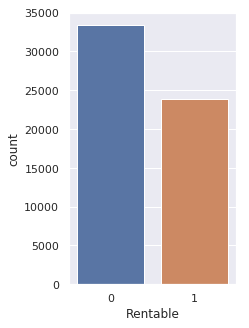

In [264]:
sns.set(style='darkgrid')
plt.figure(figsize=(3,5))
sns.countplot(x = 'Rentable',
              data = df_topsoccer2,
              order = df_topsoccer2['Rentable'].value_counts().index)
plt.show()

Se observa que hay mas jugadores que se transfieren por debajo de la media por posocion y liga 

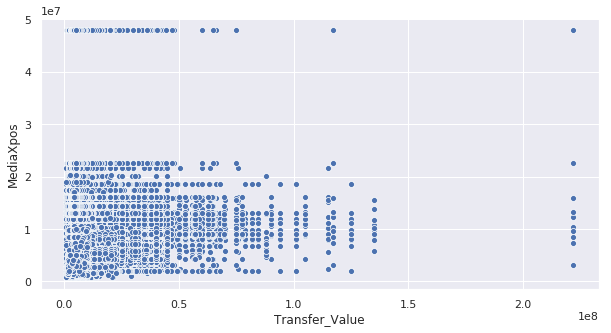

In [265]:
f, axes = plt.subplots(1,1, figsize=(10, 5), sharex=True, sharey=True)

sns.scatterplot(x="Transfer_Value", y="MediaXpos", data=df_topsoccer2)


In [266]:
x1_bp = df_topsoccer2[(df_topsoccer2['Position']== 'Attacking Midfield') & (df_topsoccer2['Rentable'] == 1) & (df_topsoccer2['Season']=='2017-2018')]
x1_mp = df_topsoccer2[(df_topsoccer2['Position']== 'Attacking Midfield') & (df_topsoccer2['Rentable'] == 0) & (df_topsoccer2['Season']=='2017-2018')]

x2_bp = df_topsoccer2[(df_topsoccer2['Position']== 'Central Midfield') & (df_topsoccer2['Rentable'] == 1) & (df_topsoccer2['Season']=='2017-2018')]
x2_mp = df_topsoccer2[(df_topsoccer2['Position']== 'Central Midfield') & (df_topsoccer2['Rentable'] == 0) & (df_topsoccer2['Season']=='2017-2018')]

x3_bp = df_topsoccer2[(df_topsoccer2['Position']== 'Centre-Back') & (df_topsoccer2['Rentable'] == 1) & (df_topsoccer2['Season']=='2017-2018')]
x3_mp = df_topsoccer2[(df_topsoccer2['Position']== 'Centre-Back') & (df_topsoccer2['Rentable'] == 0) & (df_topsoccer2['Season']=='2017-2018')]

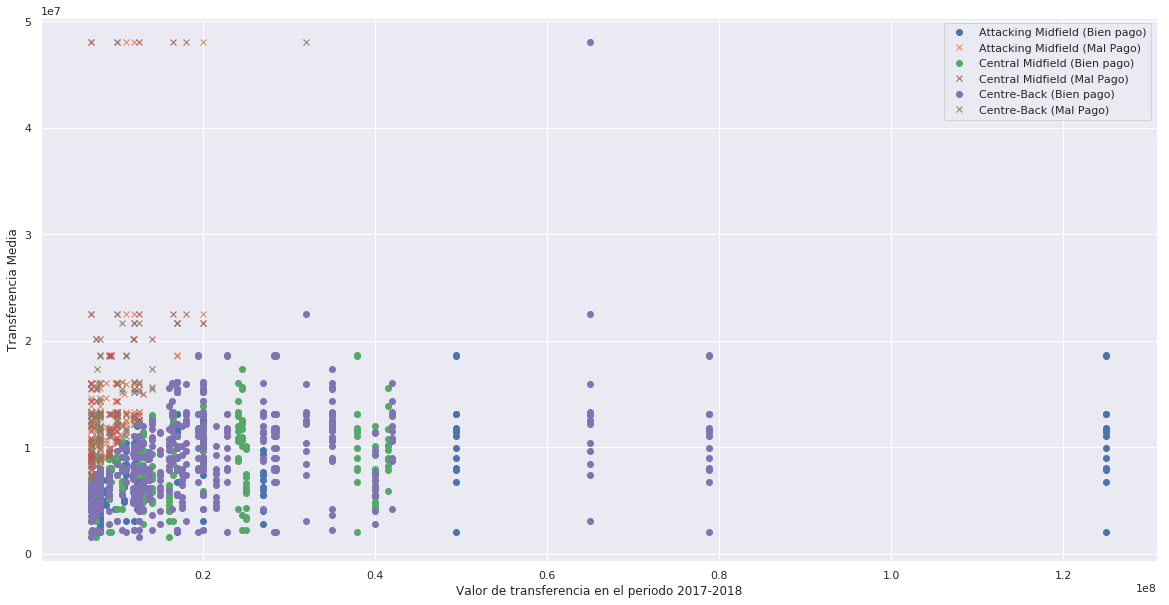

In [267]:
pl.figure(figsize = (20, 10))
pl.plot(x1_bp['Transfer_Value'], x1_bp['MediaXpos'], 'o', label="Attacking Midfield (Bien pago)");
pl.plot(x1_mp['Transfer_Value'], x1_mp['MediaXpos'], 'x', label="Attacking Midfield (Mal Pago)");
pl.plot(x2_bp['Transfer_Value'], x2_bp['MediaXpos'], 'o', label="Central Midfield (Bien pago)");
pl.plot(x2_mp['Transfer_Value'], x2_mp['MediaXpos'], 'x', label="Central Midfield (Mal Pago)");
pl.plot(x3_bp['Transfer_Value'], x3_bp['MediaXpos'], 'o', label="Centre-Back (Bien pago)");
pl.plot(x3_mp['Transfer_Value'], x3_mp['MediaXpos'], 'x', label="Centre-Back (Mal Pago)");
pl.xlabel('Valor de transferencia en el periodo 2017-2018')
pl.ylabel('Transferencia Media')
pl.legend(loc='best');

Con este Grafico buscamos mostrar la posicion de los jugadores mejores pagos 
con el analisis realizado 

Concluyendo que:
Las ligas que mas realizan transferencias de  jugadores :
la premier League con 26.72%
la Serie A con 15.72% 


que las posiciones mas transadad entre cada una de las ligas son:
Atacando el mediocampo
Centro defensa
Medio centro